In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
# import evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
data=pd.read_excel('marketing_campaign.xlsx')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
print("Shape of the dataframe:", data.shape)

Shape of the dataframe: (2240, 29)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### DATA PREPARATION

In [20]:
print("Missing data in the dataframe:")
print(data.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [22]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\382203138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].mean(),inplace=True)


In [24]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [26]:
data.duplicated().sum()

0

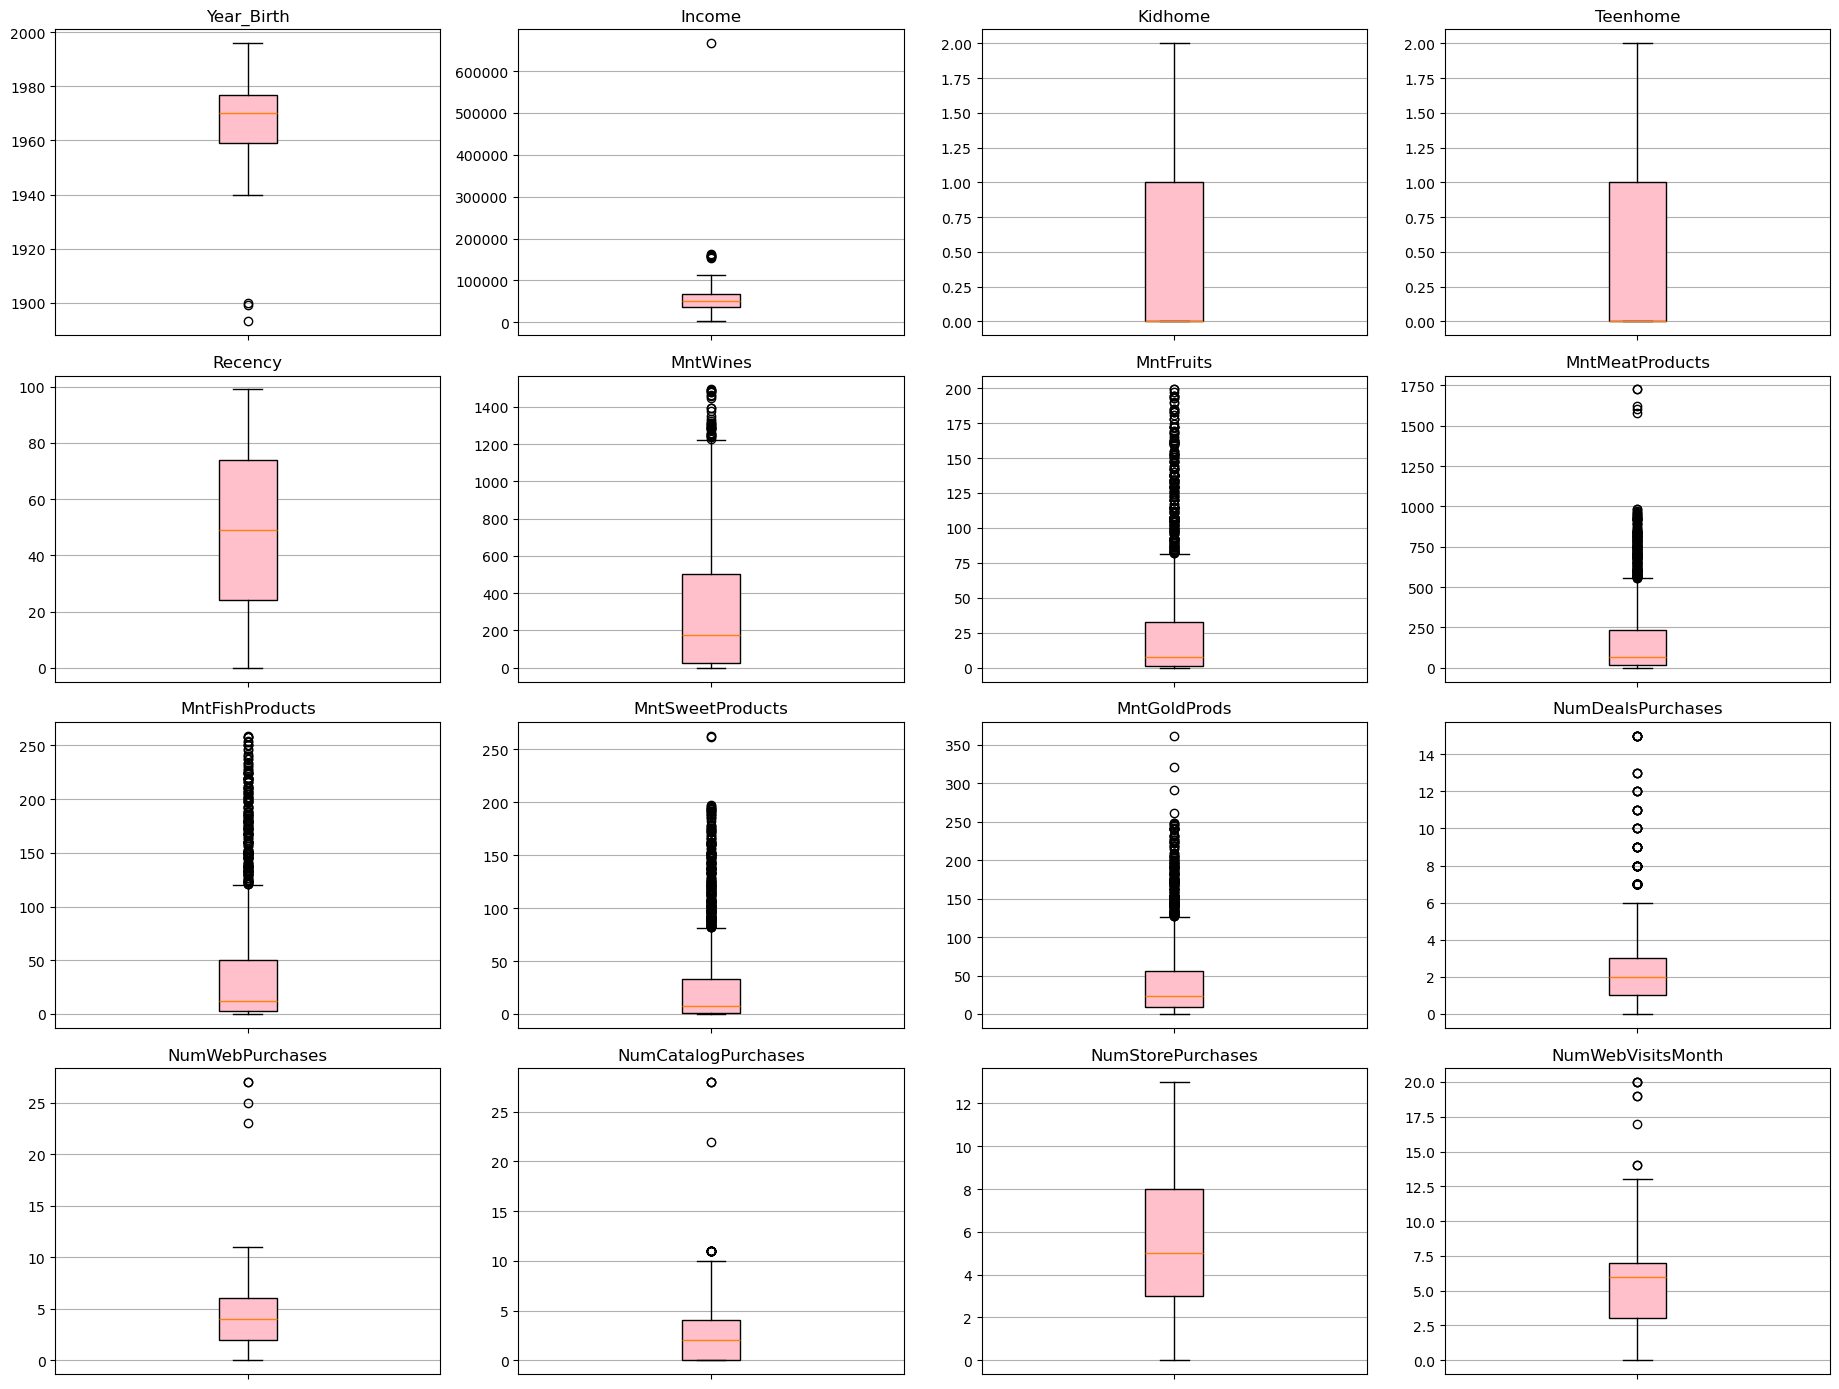

In [28]:
num_vars = [
    'Year_Birth', 'Income', 'Kidhome','Teenhome','Recency', 
    'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    ] 

fig, axes = plt.subplots(nrows=4,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(data[col], patch_artist=True)
    box['boxes'][0].set_facecolor('pink')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

In [30]:
#filter Year_Birth < 1920 and drop as it is less then 1% of the data
data.drop(data[data['Year_Birth'] < 1920].index,inplace=True)

In [32]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = data[(data['Income'] < (Q1 - 1.5 * IQR)) | (data['Income'] > (Q3 + 1.5 * IQR))]

In [34]:
data = data[~((data['Income'] < (Q1 - 1.5 * IQR)) | (data['Income'] > (Q3 + 1.5 * IQR)))]

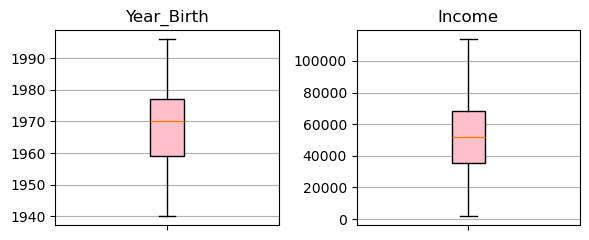

In [36]:
num_vars_detail = ['Year_Birth', 'Income'] 

fig, axes = plt.subplots(nrows=1,ncols=2) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars_detail):
    ax = axes[i]
    box = ax.boxplot(data[col], patch_artist=True)
    box['boxes'][0].set_facecolor('pink')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(6,2.5)
plt.tight_layout()
plt.show()

In [38]:
def education_level(education):
    if education in ["Graduation","phD","Master"]:
        return "High"
    elif education in ["Basic"]:
        return "Middle"
    else:
        return "Low"
    
data["Education_level"] = data["Education"].apply(education_level)

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1900944878.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Education_level"] = data["Education"].apply(education_level)


In [40]:
data["Age"] = 2024 - data["Year_Birth"]
data.head()

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\3508438462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2024 - data["Year_Birth"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_level,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,High,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,High,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,High,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,High,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,Low,43


In [42]:
data['Total_Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
data

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\504849023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_level,Age,Total_Campaigns_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,High,67,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,High,70,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,High,59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,High,40,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,Low,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,High,57,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,Low,78,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,High,43,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,High,68,0


In [44]:
data=data.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

In [46]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_level,Age,Total_Campaigns_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,High,67,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,High,70,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,High,59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,High,40,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,Low,43,0


### EXPLORATORY DATA ANALYSIS

In [49]:
responders = data[data['Response'] == 1]
non_responders = data[data['Response'] == 0]
responders[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108
std,427.183786,46.099519,286.890036,61.855885,46.327903,57.507501
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,96.000000,4.000000,47.750000,4.000000,3.000000,20.000000
50%,448.000000,21.000000,174.500000,25.000000,20.000000,39.500000
75%,875.500000,53.750000,509.750000,84.250000,57.000000,84.750000
max,1492.000000,193.000000,981.000000,250.000000,198.000000,245.000000


In [51]:
non_responders[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,270.144063,24.259103,142.535092,35.102902,25.139314,41.058047
std,305.311373,38.173559,196.636460,52.953133,40.070050,50.480142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,14.000000,2.000000,1.000000,7.000000
50%,154.000000,7.000000,56.000000,11.000000,7.000000,21.000000
75%,445.000000,29.000000,190.500000,43.500000,30.000000,53.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


Text(0, 0.5, 'Frequency')

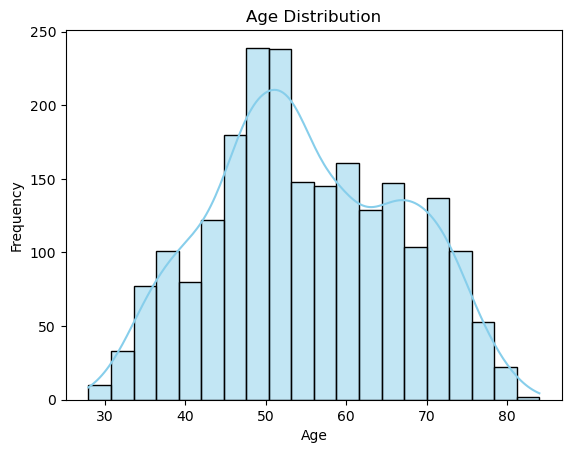

In [53]:
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


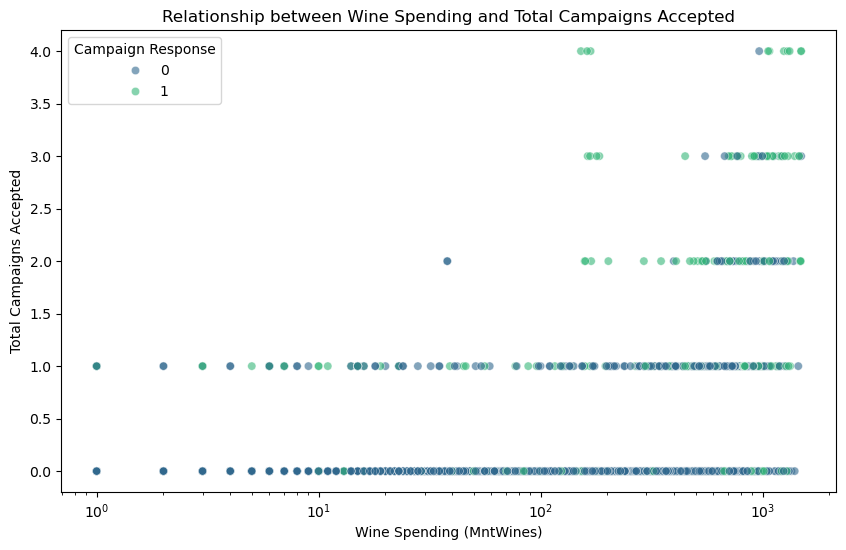

In [55]:
# Plot for MntWines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MntWines', y='Total_Campaigns_Accepted', hue='Response', palette='viridis', alpha=0.6)
plt.title("Relationship between Wine Spending and Total Campaigns Accepted")
plt.xlabel("Wine Spending (MntWines)")
plt.ylabel("Total Campaigns Accepted")
plt.legend(title="Campaign Response")
plt.xscale('log')
plt.show()


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1039418604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Response', y=feature, palette='viridis', ax=axes[i])
C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1039418604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Response', y=feature, palette='viridis', ax=axes[i])
C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1039418604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Response', y=feature, palette='viridis', ax=axes[i])
C:\User

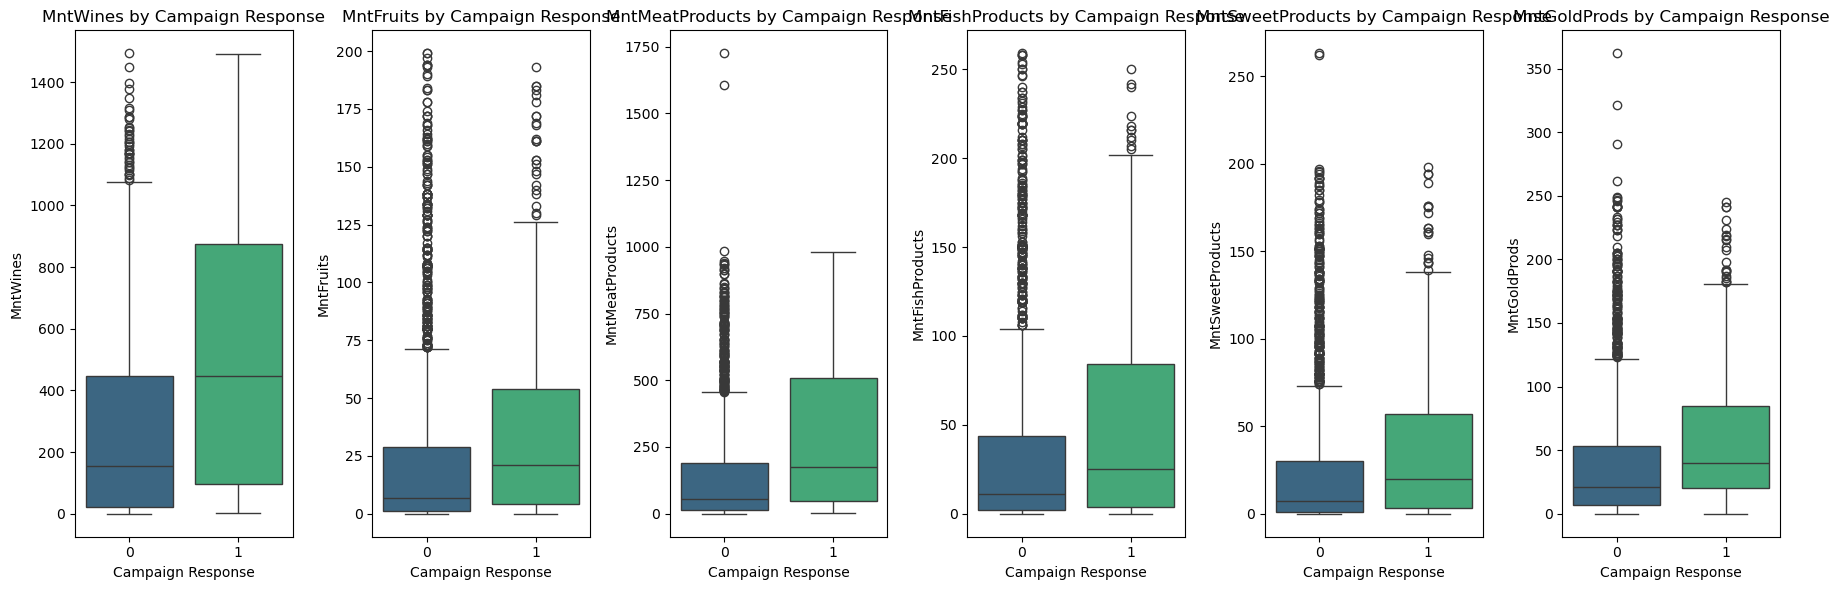

In [57]:
features = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds']
fig, axes = plt.subplots(1, len(features), figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(data=data, x='Response', y=feature, palette='viridis', ax=axes[i])
    axes[i].set_title(f"{feature} by Campaign Response")
    axes[i].set_xlabel("Campaign Response")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [59]:
#Log Tranformation
for feature in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    data[f'log_{feature}'] = np.log1p(data[feature])

In [61]:
for feature in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    threshold = data[feature].quantile(0.90)  # 90th percentile
    data[f'high_spender_{feature}'] = (data[feature] >= threshold).astype(int)


In [63]:
from sklearn.preprocessing import RobustScaler
log_features = [f'log_{feature}' for feature in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
scaler = RobustScaler()
data[log_features] = scaler.fit_transform(data[log_features])


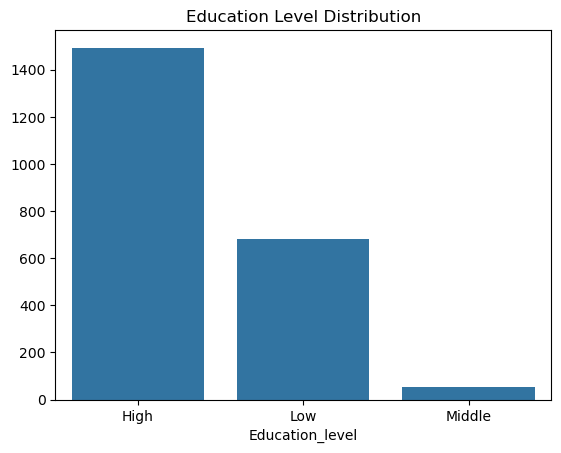

In [65]:
edulevel = data['Education_level'].value_counts()
sns.barplot(x=edulevel.index, y=edulevel.values)
plt.title('Education Level Distribution')
plt.show()

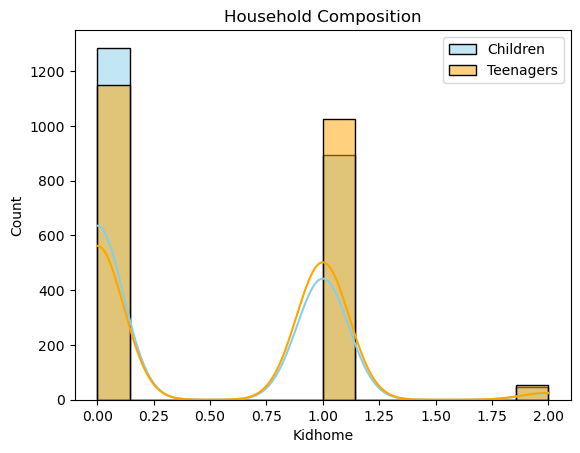

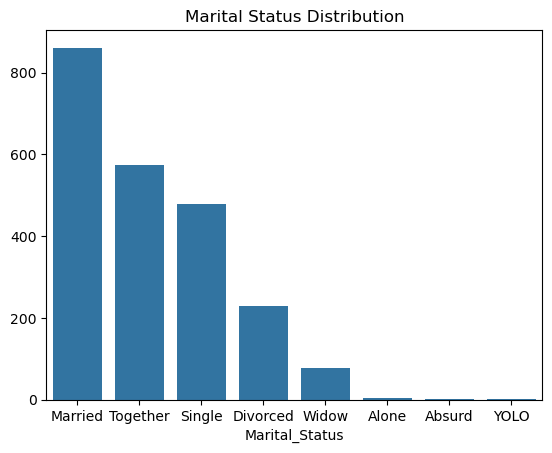

In [67]:
# Children and Teen distribution
sns.histplot(data['Kidhome'], kde=True, color="skyblue", label="Children")
sns.histplot(data['Teenhome'], kde=True, color="orange", label="Teenagers")
plt.legend()
plt.title('Household Composition')
plt.show()

# Marital Status distribution
marital_counts = data['Marital_Status'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Marital Status Distribution')
plt.show()


In [69]:
data['Marital_Status'].replace(['Absurd', 'YOLO','Alone'],'Single', inplace=True) 

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\143021068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marital_Status'].replace(['Absurd', 'YOLO','Alone'],'Single', inplace=True)


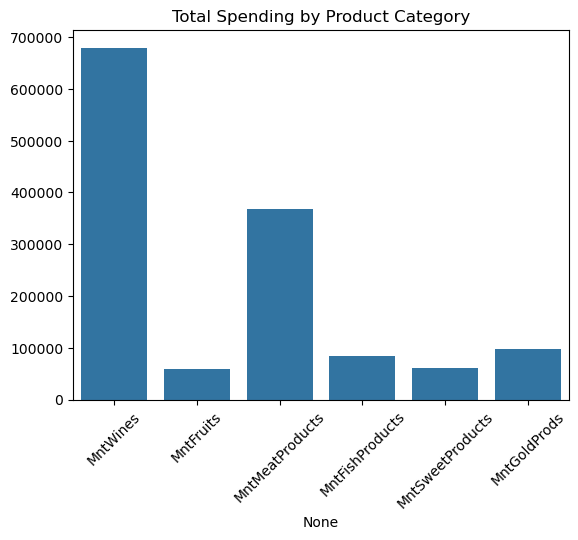

In [71]:
# Total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

# Spending by category
category_sums = data[spending_cols].sum()
sns.barplot(x=category_sums.index, y=category_sums.values)
plt.title('Total Spending by Product Category')
plt.xticks(rotation=45)
plt.show()


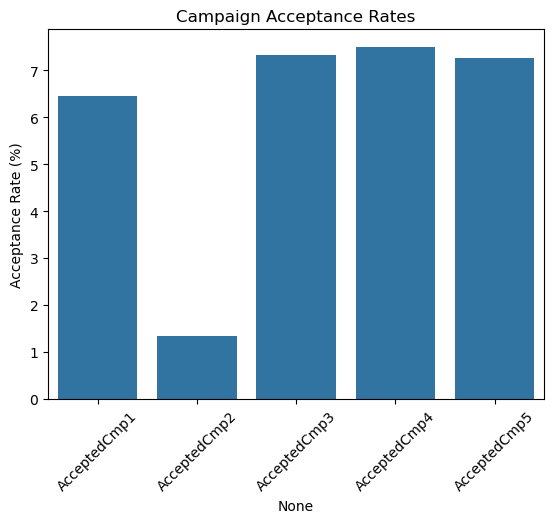

In [174]:
# Calculate acceptance rates
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = data[campaign_cols].mean() * 100  # in %

sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.title('Campaign Acceptance Rates')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()


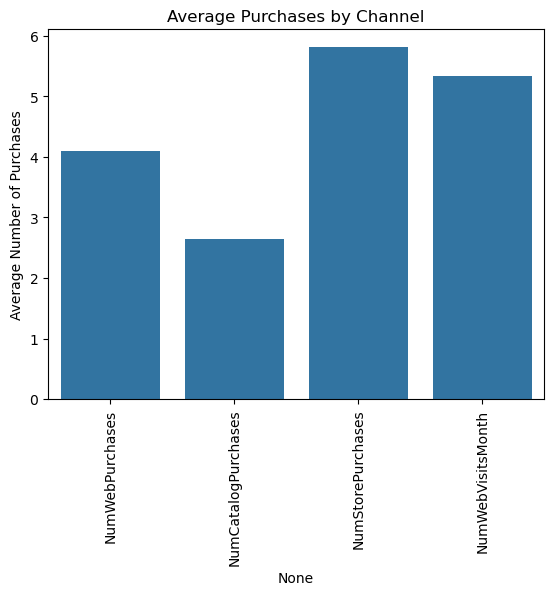

In [75]:
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


# Plot average purchase by channel
avg_purchases = data[purchase_channels].mean()
sns.barplot(x=avg_purchases.index, y=avg_purchases.values)
plt.title('Average Purchases by Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=90)
plt.show()


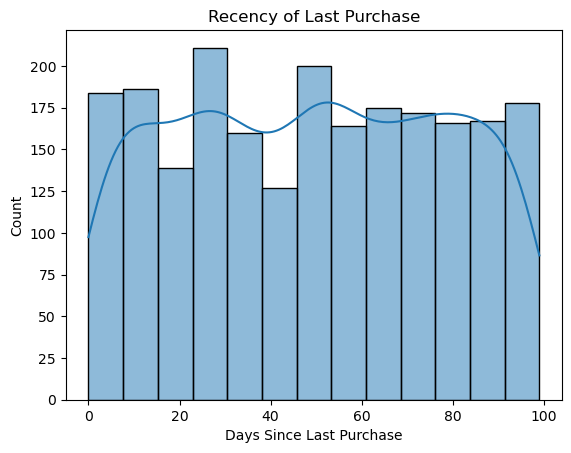

NameError: name 'datetime' is not defined

In [77]:
# Recency distribution
sns.histplot(data['Recency'], kde=True)
plt.title('Recency of Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.show()

# Customer Lifetime calculation
data['Enrollment_Days'] = (datetime.datetime.now() - pd.to_datetime(data['Dt_Customer'])).dt.days
sns.histplot(data['Enrollment_Days'], kde=True)
plt.title('Customer Lifetime with Company')
plt.xlabel('Days Since Enrollment')
plt.show()


In [92]:
df=data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,high_spender_MntWines,high_spender_MntFruits,high_spender_MntMeatProducts,high_spender_MntFishProducts,high_spender_MntSweetProducts,high_spender_MntGoldProds,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1.016818,0.800577,0.729552,0,1,1,1,0,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,-0.576044,-0.525497,-0.731394,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0.846012,0.312283,0.311597,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,-0.065626,-0.283324,-0.819962,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0.504884,0.396541,-0.256418,0,0,0,0,0,0,422


In [94]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_level', 'Age',
       'Total_Campaigns_Accepted', 'log_MntWines', 'log_MntFruits',
       'log_MntMeatProducts', 'log_MntFishProducts', 'log_MntSweetProducts',
       'log_MntGoldProds', 'high_spender_MntWines', 'high_spender_MntFruits',
       'high_spender_MntMeatProducts', 'high_spender_MntFishProducts',
       'high_spender_MntSweetProducts', 'high_spender_MntGoldProds',
       'Total_Spending'],
      dtype='object')

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\823833325.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_acceptance = df.groupby('Age_Group')['Total_Campaigns_Accepted'].mean()


Text(0, 0.5, 'Average Campaigns Accepted')

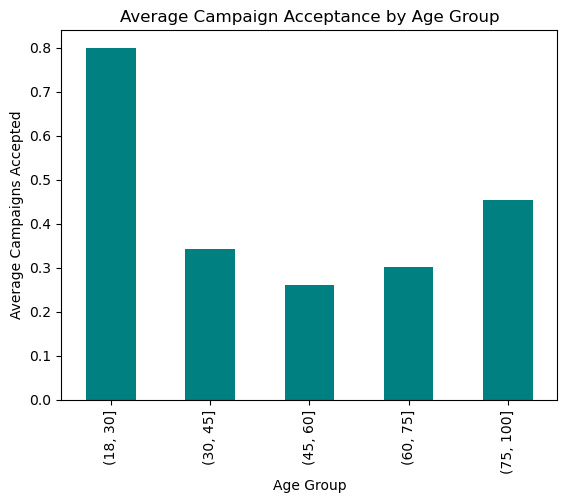

In [96]:
age_bins = [18, 30, 45, 60, 75, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)
campaign_acceptance = df.groupby('Age_Group')['Total_Campaigns_Accepted'].mean()
campaign_acceptance.plot(kind='bar', color='teal')
plt.title('Average Campaign Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Campaigns Accepted')


Text(0.5, 1.0, 'Spending Pattern by Product Category')

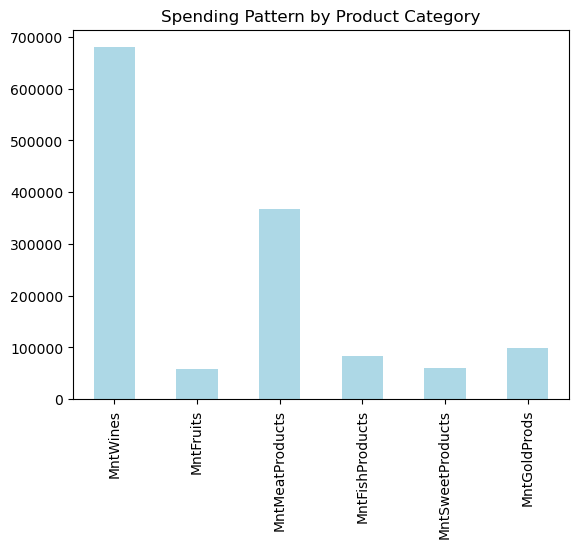

In [98]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[product_columns].sum().plot(kind='bar', color='lightblue')
plt.title('Spending Pattern by Product Category')

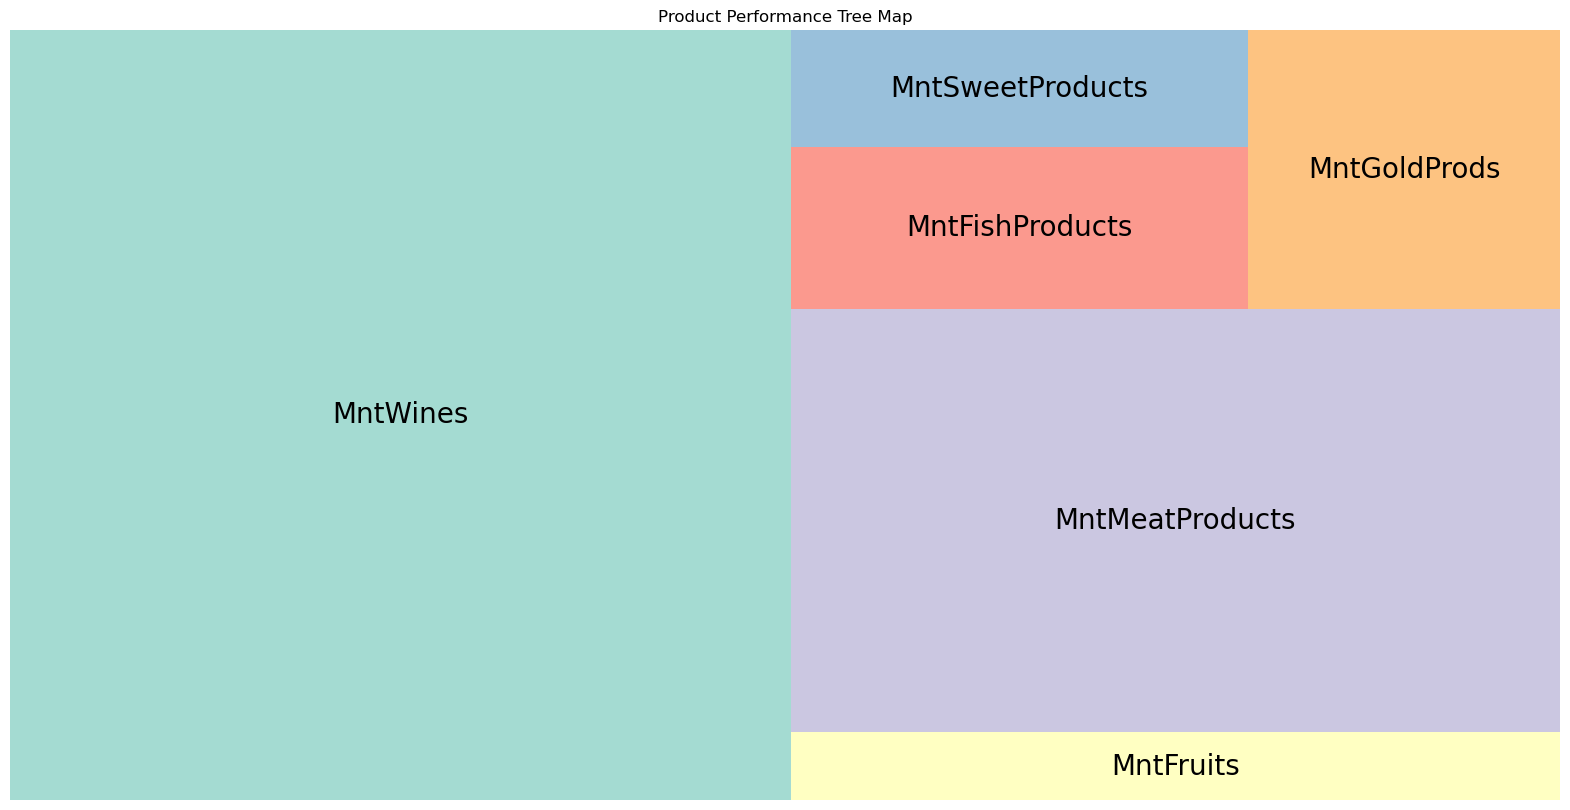

In [100]:
#colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total amount spent in each category
product_totals = df[product_columns].sum()

# Plot the treemap
plt.figure(figsize=(20,10))
sq.plot(sizes=product_totals.values, label=product_columns, color=sns.color_palette("Set3"), alpha=0.8,text_kwargs={'fontsize':20})
plt.title('Product Performance Tree Map')
plt.axis('off')  # Turn off axis for better visual appearance
plt.show()


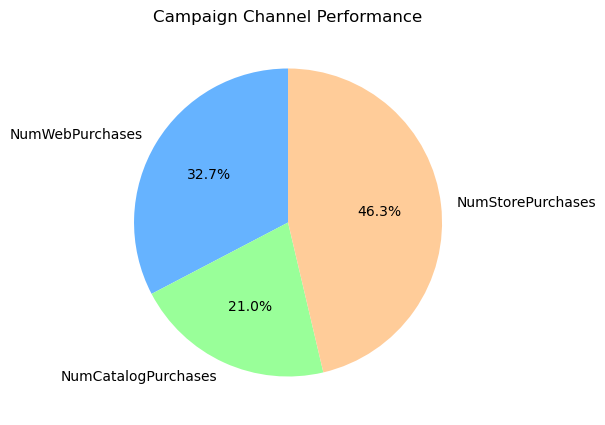

In [102]:
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_totals = df[channel_columns].sum()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(channel_totals, labels=channel_columns, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Campaign Channel Performance')
plt.show()

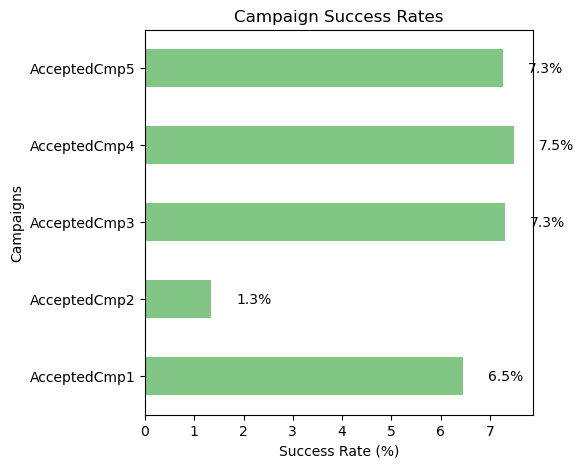

In [104]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate success rate for each campaign
campaign_success_rates = df[campaign_columns].sum() / len(df) * 100  # percentage

fig, ax = plt.subplots(figsize=(5,5))

# Plot horizontal bar chart
campaign_success_rates.plot(kind='barh', color='#4CAF50', alpha=0.7, ax=ax)
ax.set_title('Campaign Success Rates')
ax.set_xlabel('Success Rate (%)')
ax.set_ylabel('Campaigns')

# Add data labels
for index, value in enumerate(campaign_success_rates):
    ax.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.show()

In [106]:
# Calculate success rate for each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
success_rates = df[campaign_columns].mean()  # Mean indicates the proportion of '1's (successes)
print(success_rates)

AcceptedCmp1    0.064603
AcceptedCmp2    0.013459
AcceptedCmp3    0.073127
AcceptedCmp4    0.074921
AcceptedCmp5    0.072678
dtype: float64


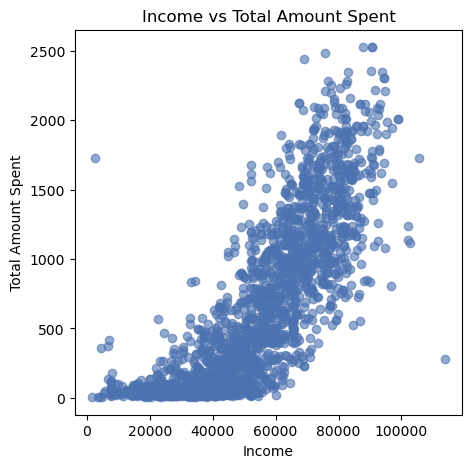

In [108]:
# Create a new column for total spending
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Plot Income vs Total Spent
plt.figure(figsize=(5,5))
plt.scatter(df['Income'], df['TotalSpent'], alpha=0.6, color='#4C72B0')
plt.title('Income vs Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.show()


F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Customer Segmentation by Income and Spending')

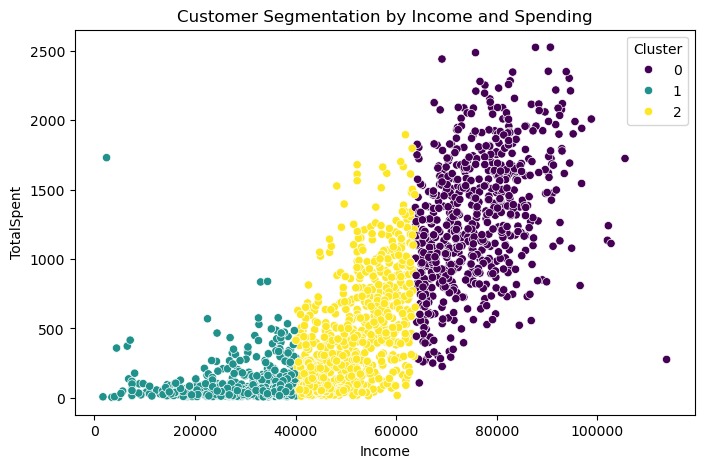

In [110]:
from sklearn.cluster import KMeans
features = df[['Income', 'Age', 'TotalSpent']]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='TotalSpent', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation by Income and Spending')


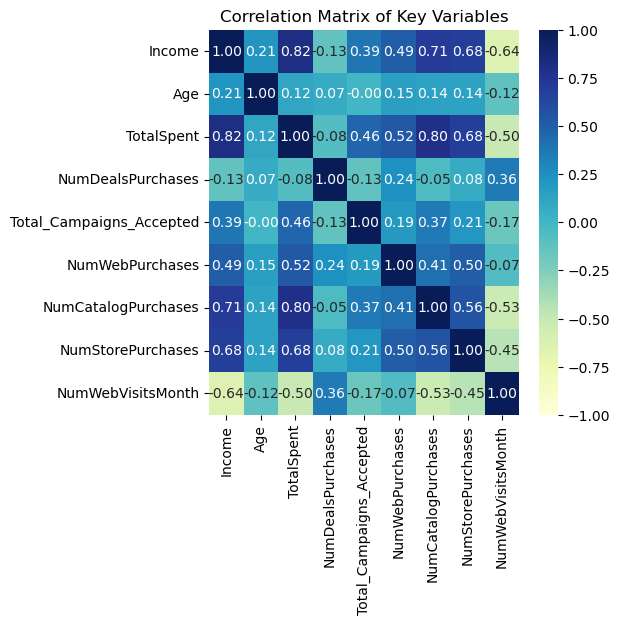

In [111]:
# Selecting relevant columns for correlation matrix
correlation_columns = [
    'Income', 
    'Age', 
    'TotalSpent', 
    'NumDealsPurchases', 
    'Total_Campaigns_Accepted', 
    'NumWebPurchases', 
    'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth'
]

# Creating the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Key Variables")
plt.show()

In [113]:
campaign_trends = df.groupby('Total_Campaigns_Accepted').agg({
    'Income': 'mean',
    'Total_Spending': 'mean'
}).reset_index()

# Rename the 'Accepted_Any_Campaign' values for easier interpretation (0 = No, 1 = Yes)
campaign_trends['Total_Campaigns_Accepted'] = campaign_trends['Total_Campaigns_Accepted'].replace({0: 'Did Not Accept Any Campaign', 1: 'Accepted At Least One Campaign'})

print(campaign_trends)

         Total_Campaigns_Accepted        Income  Total_Spending
0     Did Not Accept Any Campaign  48105.762890      477.462366
1  Accepted At Least One Campaign  59403.819453      918.645062
2                               2  75178.969912     1408.048193
3                               3  82877.272727     1705.636364
4                               4  85861.636364     1501.636364


Text(0.5, 1.0, 'Recency vs Total Spending')

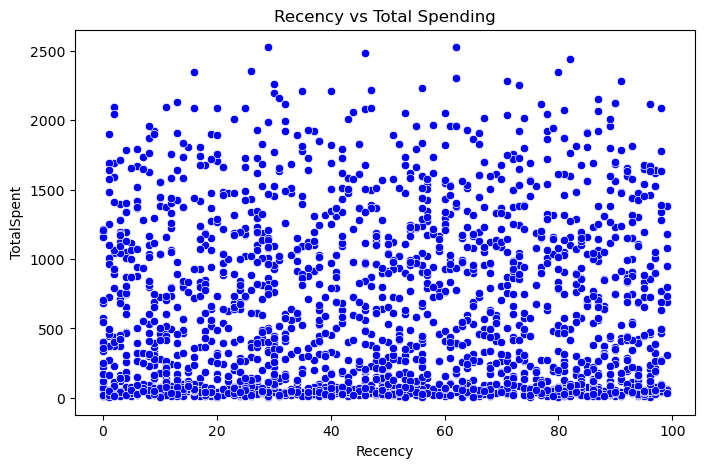

In [116]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Recency', y='TotalSpent', data=df, color='blue')
plt.title('Recency vs Total Spending')


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1117199826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cmp, y='Response', data=df, ax=axes[i], palette='viridis')
C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1117199826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cmp, y='Response', data=df, ax=axes[i], palette='viridis')
C:\Users\saros\AppData\Local\Temp\ipykernel_20392\1117199826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cmp, y='Response', data=df, ax=axes[i], palette='viridis')
C:\Users\saros\AppData\Lo

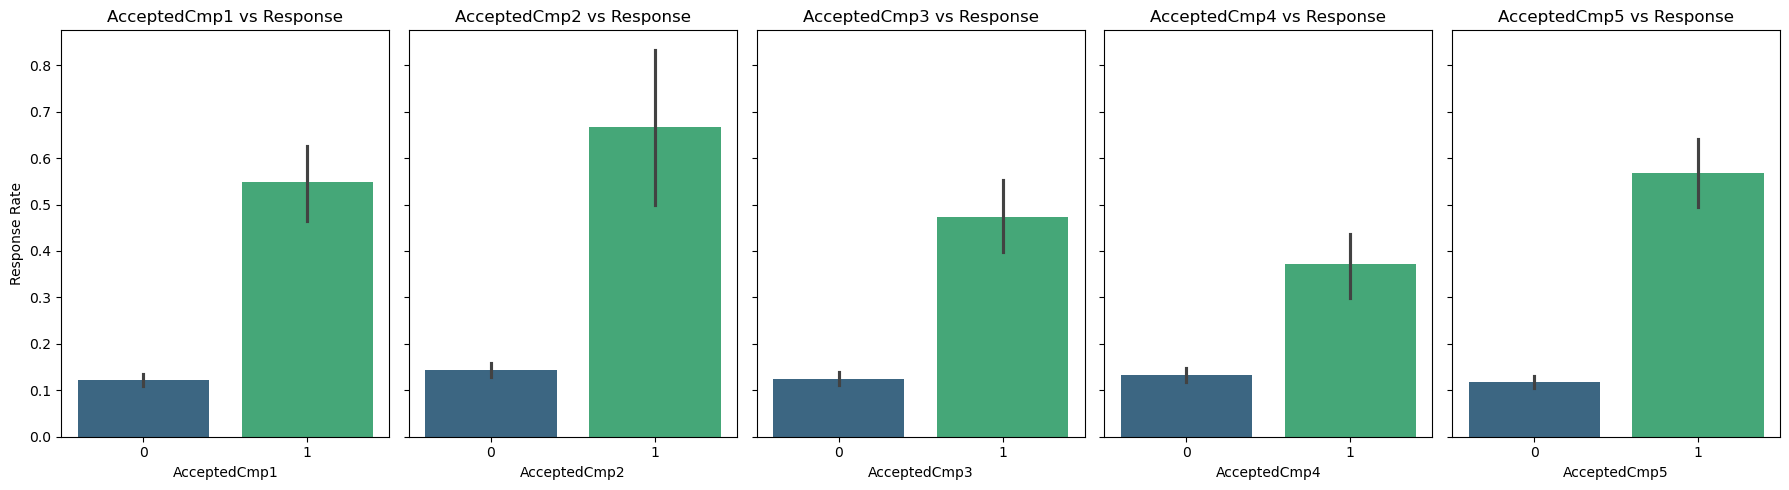

In [118]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

# Plot each campaign's acceptance rate with respect to Response
for i, cmp in enumerate(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']):
    sns.barplot(x=cmp, y='Response', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{cmp} vs Response')
    axes[i].set_ylabel('Response Rate')
    axes[i].set_xlabel(cmp)

plt.tight_layout()
plt.show()

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\2204808219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='NumDealsPurchases', data=df, palette='pastel')


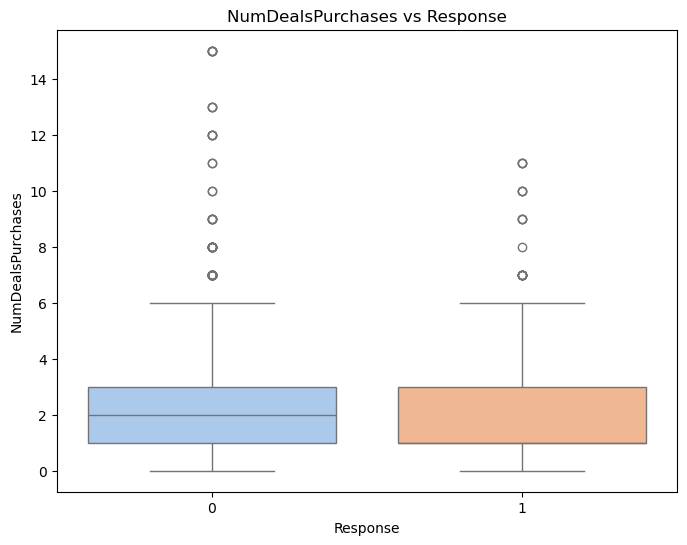

In [119]:
# Box plot to show distribution of NumDealsPurchases by Response
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='NumDealsPurchases', data=df, palette='pastel')
plt.title('NumDealsPurchases vs Response')
plt.xlabel('Response')
plt.ylabel('NumDealsPurchases')
plt.show()


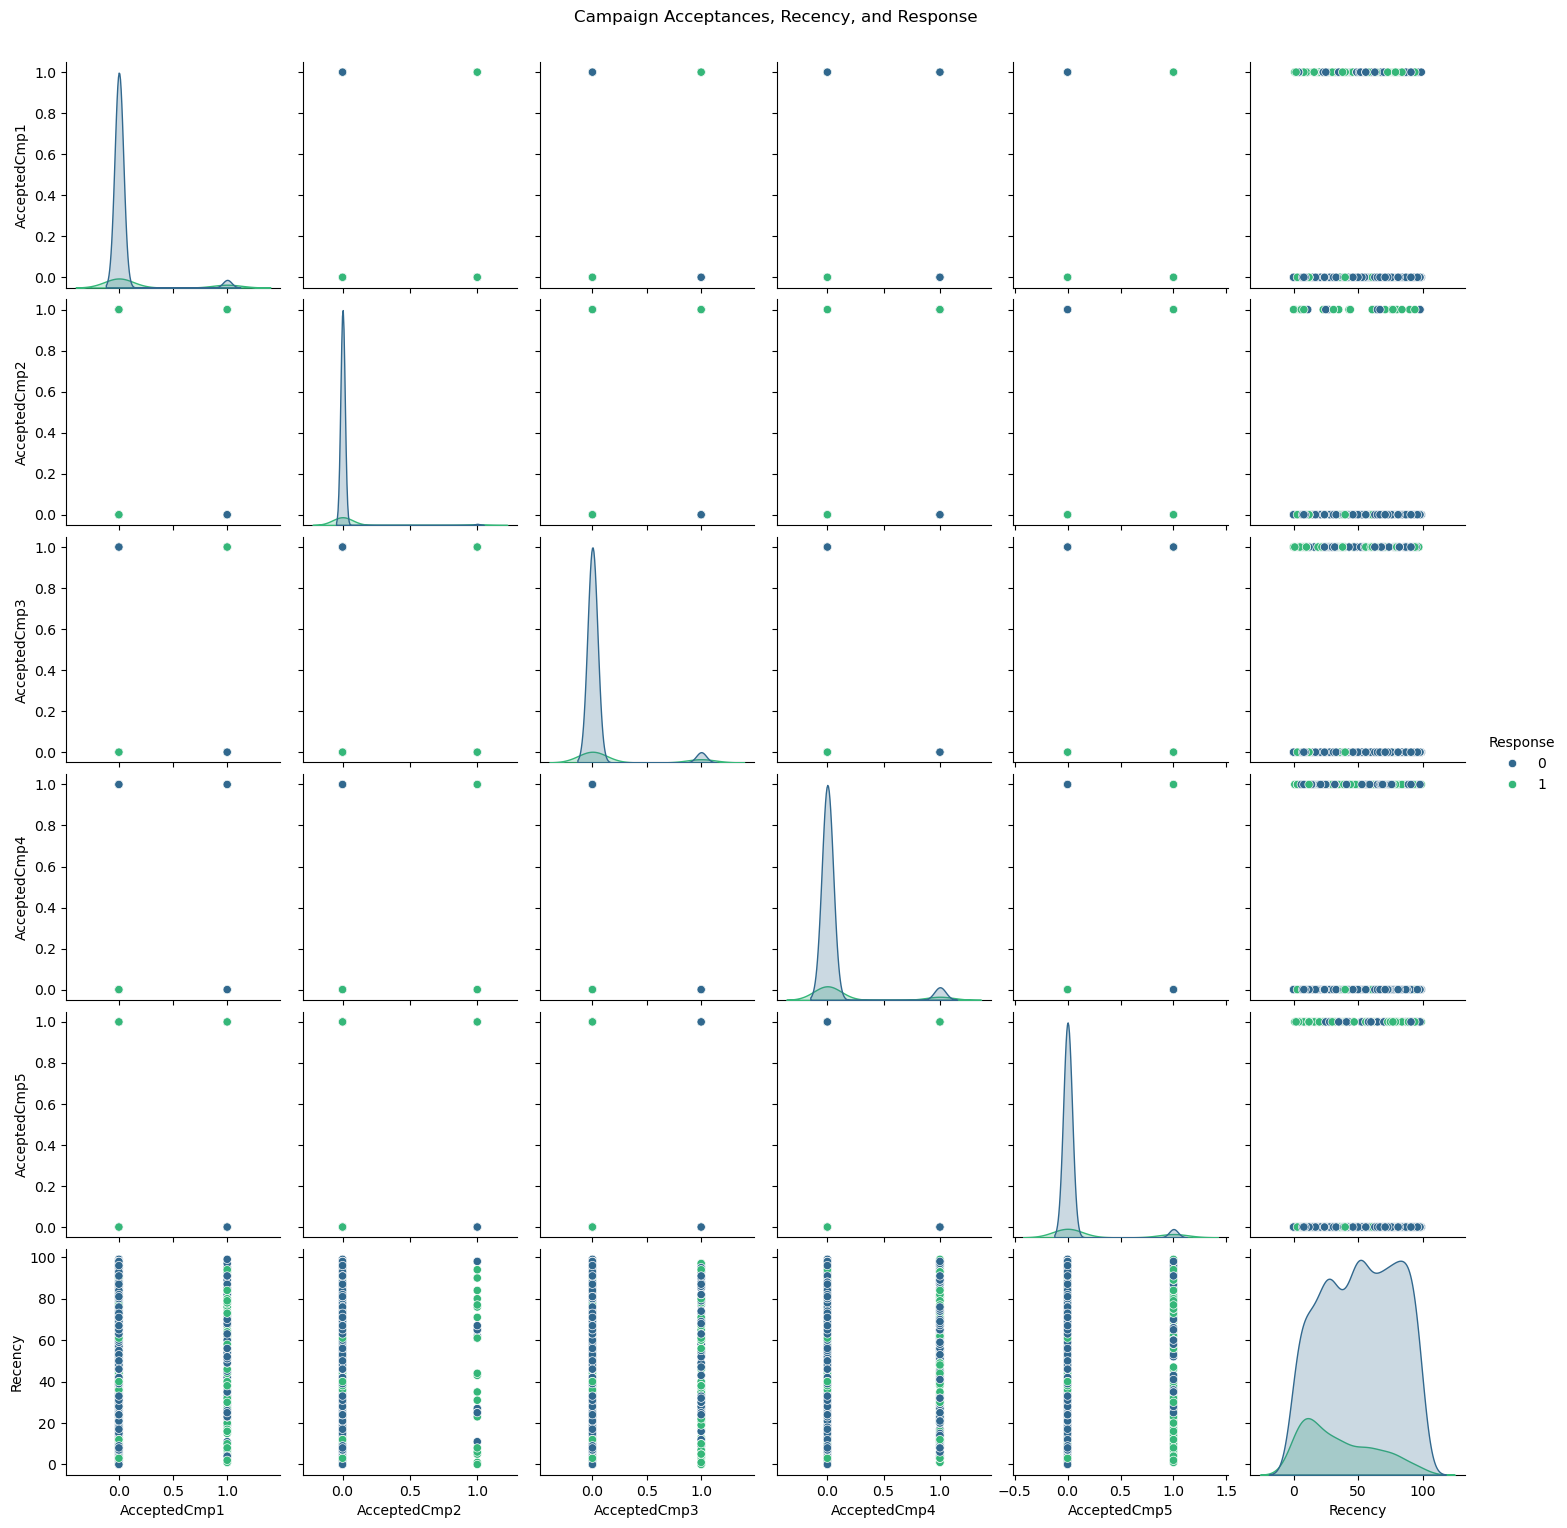

In [121]:
sns.pairplot(df, vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Recency'], hue='Response', palette='viridis')
plt.suptitle('Campaign Acceptances, Recency, and Response', y=1.02)
plt.show()


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\806580707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month_Joined', data=df, palette='Blues')


Text(0.5, 1.0, 'Customer Acquisition by Month')

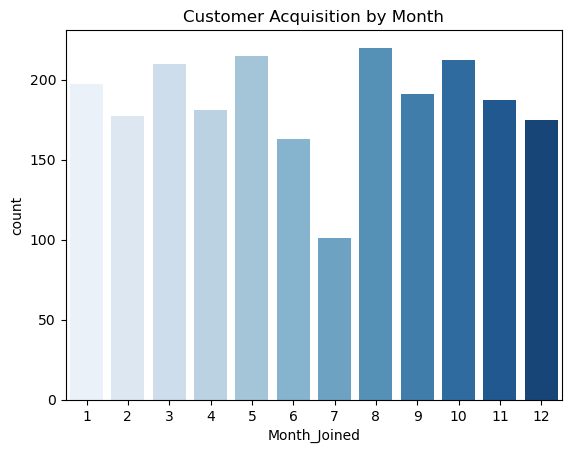

In [123]:
df['Month_Joined'] = pd.to_datetime(df['Dt_Customer']).dt.month
sns.countplot(x='Month_Joined', data=df, palette='Blues')
plt.title('Customer Acquisition by Month')


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\493658037.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='Response', index='Recency_bins', columns='NumDeals_bins', aggfunc='mean')


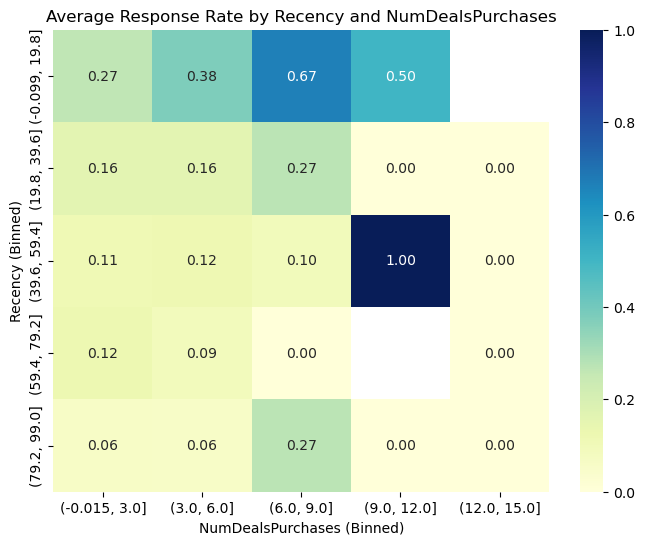

In [124]:
# Create bins for Recency and NumDealsPurchases to make a heatmap feasible
df['Recency_bins'] = pd.cut(df['Recency'], bins=5)
df['NumDeals_bins'] = pd.cut(df['NumDealsPurchases'], bins=5)

# Pivot table to calculate average Response
heatmap_data = df.pivot_table(values='Response', index='Recency_bins', columns='NumDeals_bins', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Response Rate by Recency and NumDealsPurchases')
plt.xlabel('NumDealsPurchases (Binned)')
plt.ylabel('Recency (Binned)')
plt.show()


In [125]:
# Create a new column to indicate if there was any discount used
df['Used_Discount'] = (df['NumDealsPurchases'] > 0).astype(int)

In [130]:
# Define the spending columns for each product category
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the average spending for each category with and without discounts
avg_spending = df.groupby('Used_Discount')[spending_columns].mean().transpose()
avg_spending.columns = ['Without Discount', 'With Discount']

print(avg_spending)

                  Without Discount  With Discount
MntWines                586.829268     299.710238
MntFruits                60.975610      25.699726
MntMeatProducts         448.560976     159.975777
MntFishProducts          76.439024      36.915448
MntSweetProducts         80.439024      26.163163
MntGoldProds             85.512195      43.337294


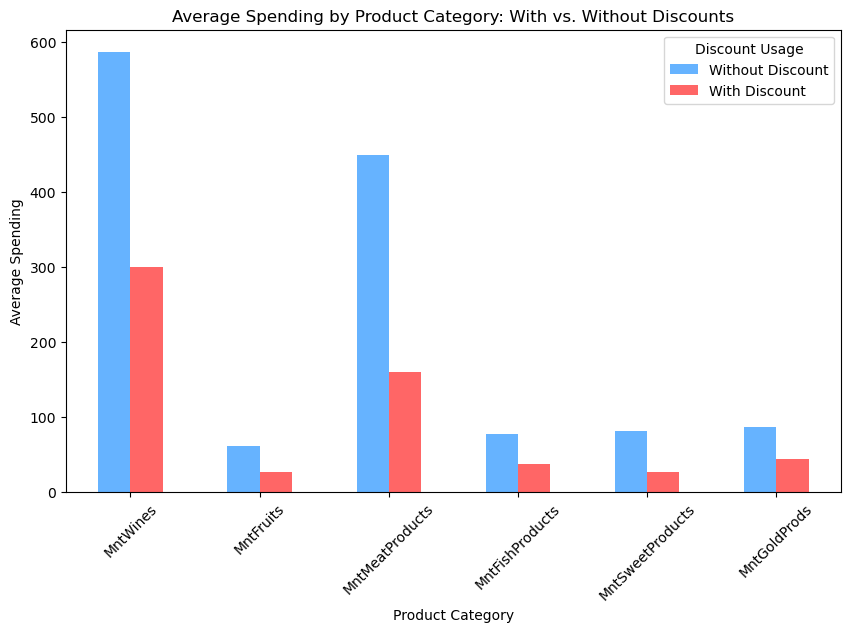

In [132]:
avg_spending.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff6666'])
plt.title('Average Spending by Product Category: With vs. Without Discounts')
plt.ylabel('Average Spending')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.legend(title='Discount Usage')
plt.show()

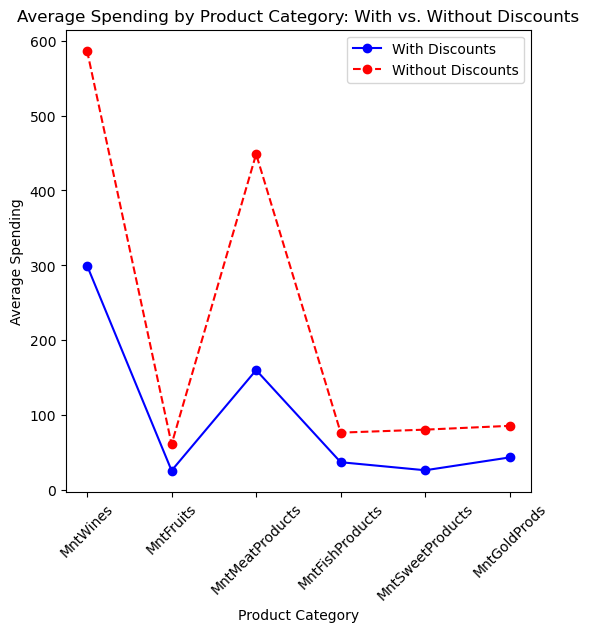

In [134]:
with_discounts = df[df['NumDealsPurchases'] > 0][product_columns].mean()
without_discounts = df[df['NumDealsPurchases'] == 0][product_columns].mean()

# Plotting the line charts
plt.figure(figsize=(6, 6))

# Line chart for purchases with discounts
plt.plot(product_columns, with_discounts, label='With Discounts', marker='o', color='b', linestyle='-')

# Line chart for purchases without discounts
plt.plot(product_columns, without_discounts, label='Without Discounts', marker='o', color='r', linestyle='--')

# Adding titles and labels
plt.title('Average Spending by Product Category: With vs. Without Discounts')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.legend()
plt.xticks(rotation=45)

plt.show()

C:\Users\saros\AppData\Local\Temp\ipykernel_20392\2303395960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Total_Campaigns_Accepted', y='TotalSpent', palette='viridis')


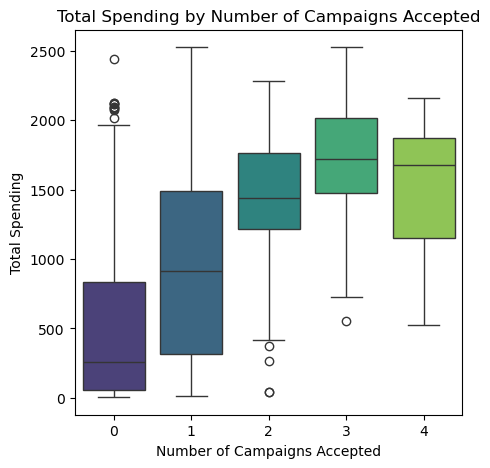

In [136]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Total_Campaigns_Accepted', y='TotalSpent', palette='viridis')
plt.title('Total Spending by Number of Campaigns Accepted')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Total Spending')
plt.show()

In [138]:
# Define campaign acceptance columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate acceptance rate for each campaign
acceptance_rates = df[campaign_columns].mean() * 100  # Convert to percentage
print(acceptance_rates)


AcceptedCmp1    6.460296
AcceptedCmp2    1.345895
AcceptedCmp3    7.312696
AcceptedCmp4    7.492149
AcceptedCmp5    7.267833
dtype: float64


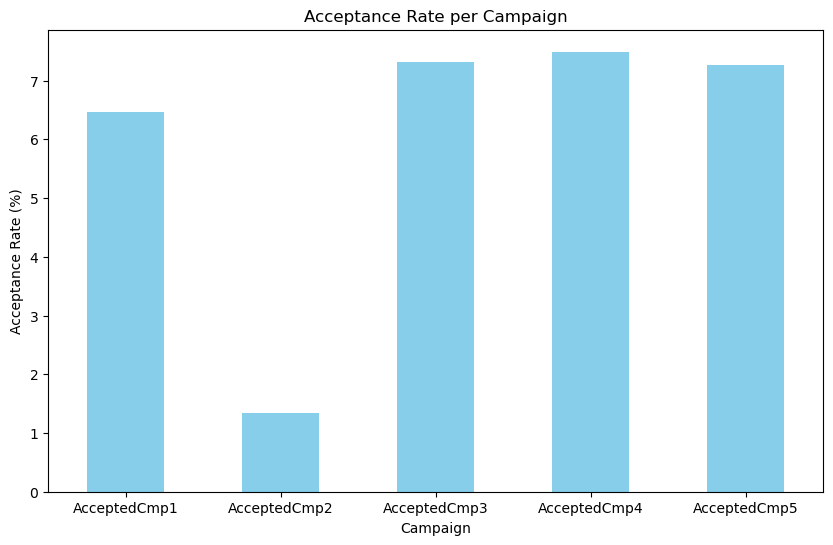

In [140]:
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Acceptance Rate per Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [142]:
education_response_ct = pd.crosstab(df['Education'], df['Response'], normalize='index') * 100  
education_response_ct.columns = ['No Response', 'Response'] 
print(education_response_ct)

            No Response   Response
Education                         
2n Cycle      89.054726  10.945274
Basic         96.296296   3.703704
Graduation    86.476868  13.523132
Master        84.552846  15.447154
PhD           79.002079  20.997921


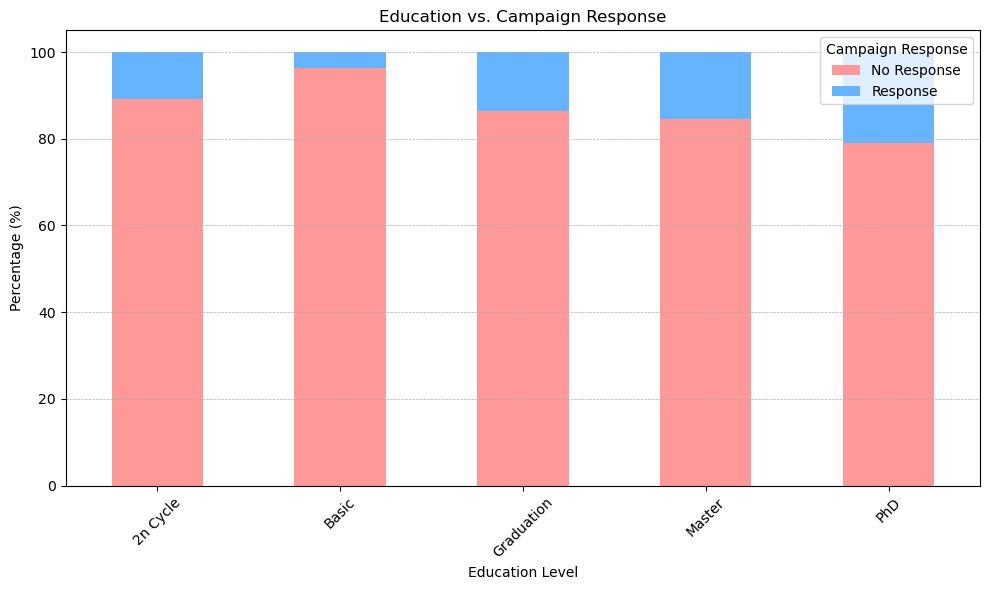

In [144]:
education_response_ct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

# Add labels and title
plt.title('Education vs. Campaign Response')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Campaign Response', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [146]:
age_group_response_ct = pd.crosstab(df['Age_Group'], df['Response'], normalize='index') * 100 
education_response_ct.columns = ['No Response', 'Response']
print(age_group_response_ct)

Response           0          1
Age_Group                      
(18, 30]   70.000000  30.000000
(30, 45]   81.974249  18.025751
(45, 60]   86.278381  13.721619
(60, 75]   85.972851  14.027149
(75, 100]  80.519481  19.480519


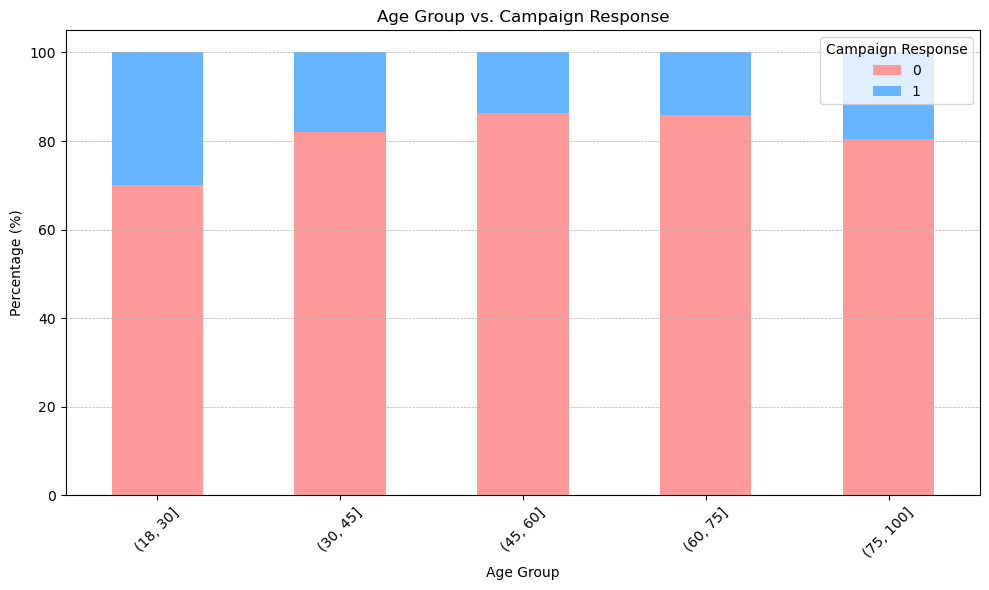

In [148]:
age_group_response_ct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

# Add labels and title
plt.title('Age Group vs. Campaign Response')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Campaign Response', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [150]:
marital_status_response_ct = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index') * 100 
marital_status_response_ct.columns = ['No Response', 'Response'] 
print(marital_status_response_ct)

                No Response   Response
Marital_Status                        
Divorced          79.130435  20.869565
Married           88.617886  11.382114
Single            77.572016  22.427984
Together          89.565217  10.434783
Widow             75.324675  24.675325


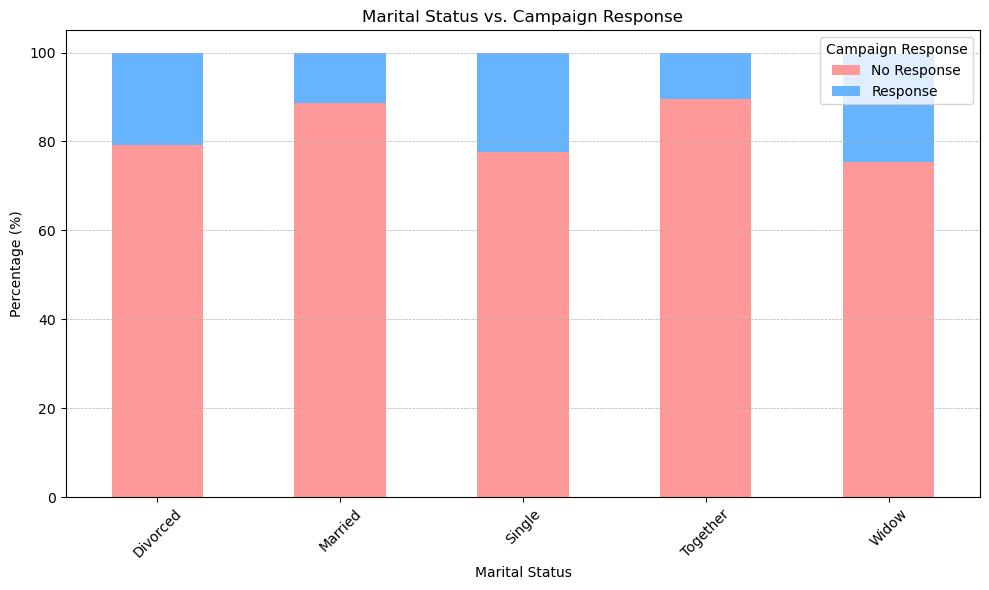

In [152]:
marital_status_response_ct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

# Add labels and title
plt.title('Marital Status vs. Campaign Response')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.legend(title='Campaign Response', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [154]:
age_discount_usage = df.groupby('Age_Group')['Used_Discount'].mean() * 100  
print(age_discount_usage)

Age_Group
(18, 30]     100.000000
(30, 45]      98.068670
(45, 60]      98.519250
(60, 75]      98.340875
(75, 100]     92.207792
Name: Used_Discount, dtype: float64


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\2472217877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_discount_usage = df.groupby('Age_Group')['Used_Discount'].mean() * 100


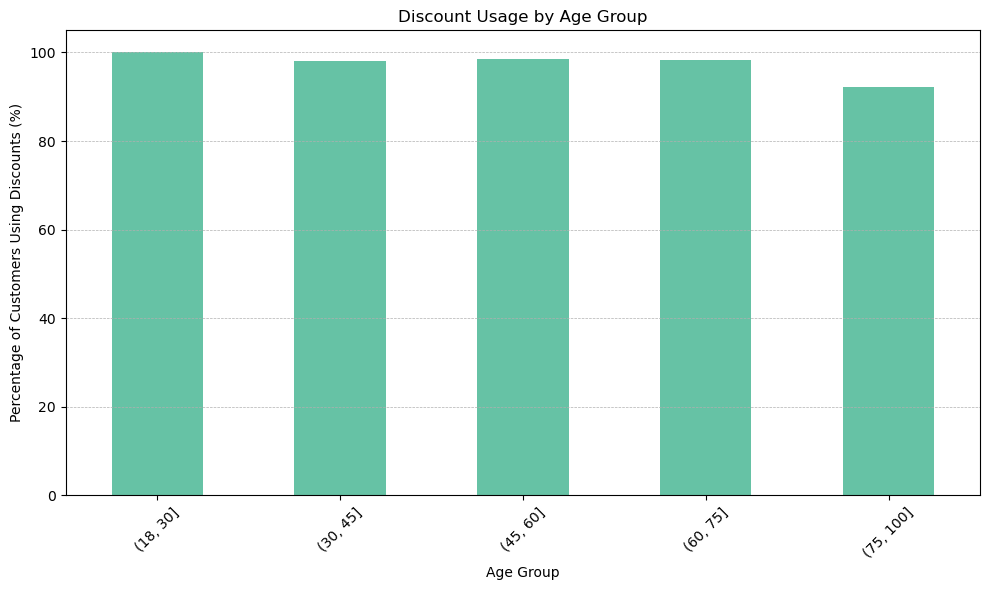

In [156]:
plt.figure(figsize=(10, 6))
age_discount_usage.plot(kind='bar', color='#66c2a5')

# Add labels and title
plt.title('Discount Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers Using Discounts (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [158]:
purchase_modes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculate the average purchases in each mode by age group
age_group_purchases = df.groupby('Age_Group')[purchase_modes].mean()
print(age_group_purchases)

           NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Age_Group                                                         
(18, 30]          3.300000             3.900000           6.900000
(30, 45]          3.527897             2.304721           5.298283
(45, 60]          4.063179             2.331688           5.589339
(60, 75]          4.428356             3.129713           6.333333
(75, 100]         5.324675             4.246753           7.233766


C:\Users\saros\AppData\Local\Temp\ipykernel_20392\590254750.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = df.groupby('Age_Group')[purchase_modes].mean()


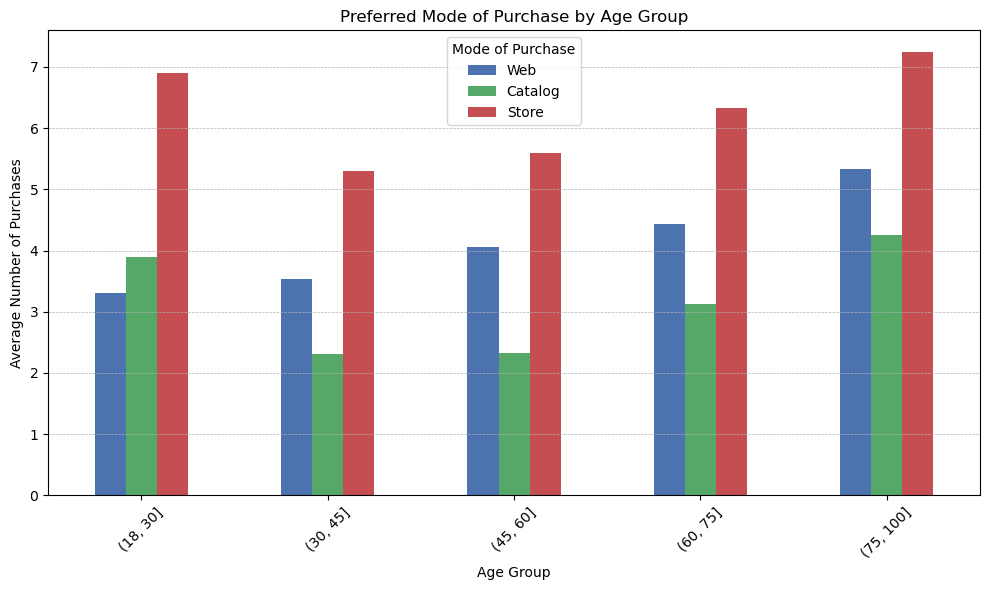

In [160]:
age_group_purchases.plot(kind='bar', figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])

# Add labels and title
plt.title('Preferred Mode of Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Mode of Purchase', labels=['Web', 'Catalog', 'Store'])
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [162]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending by cluster
cluster_spending = df.groupby('Cluster')[spending_columns].mean()
print(cluster_spending)

           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0        623.426761  56.676056       386.730986        81.546479   
1         30.088556   6.027248        25.516349         9.104905   
2        274.022930  17.919745        95.681529        24.616561   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0               59.387324     71.116901  
1                6.050409     17.720708  
2               17.754140     44.366879  


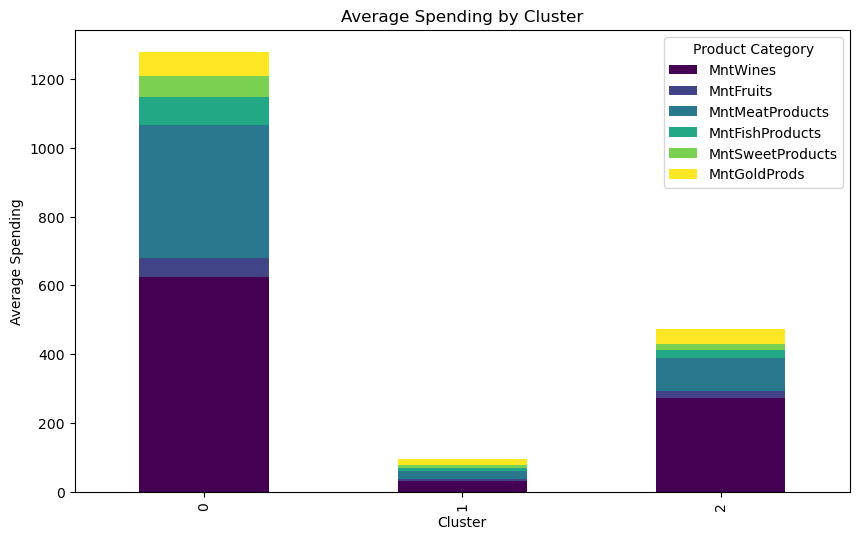

In [164]:
cluster_spending.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Average Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.legend(title='Product Category')
plt.show()

In [166]:
cluster_purchase_modes = df.groupby('Cluster')[purchase_modes].mean()
print(cluster_purchase_modes)

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Cluster                                                         
0               5.502817             5.326761           8.500000
1               2.151226             0.527248           3.077657
2               4.653503             2.175796           5.938854


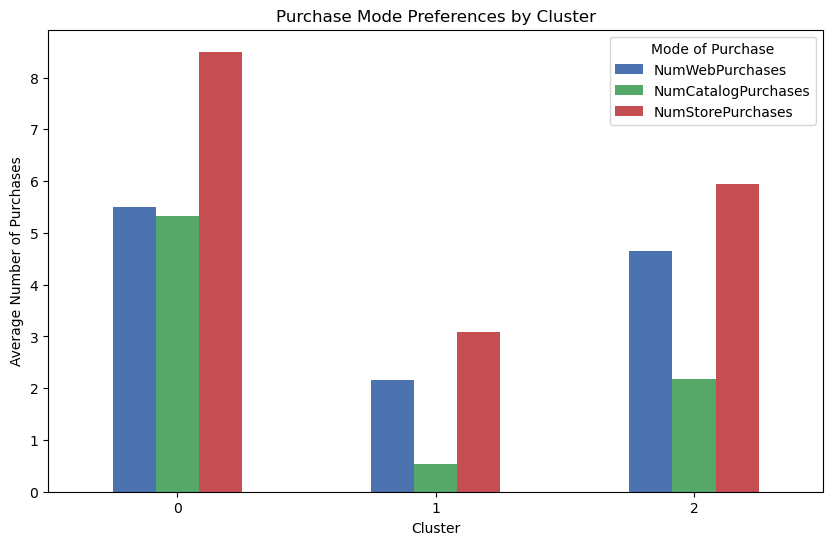

In [168]:
cluster_purchase_modes.plot(kind='bar', figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Purchase Mode Preferences by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases')
plt.legend(title='Mode of Purchase')
plt.xticks(rotation=0)
plt.show()

In [170]:
cluster_response = df.groupby('Cluster')['Response'].mean() * 100  # Convert to percentage
print(cluster_response)

Cluster
0    23.661972
1    11.580381
2    10.318471
Name: Response, dtype: float64


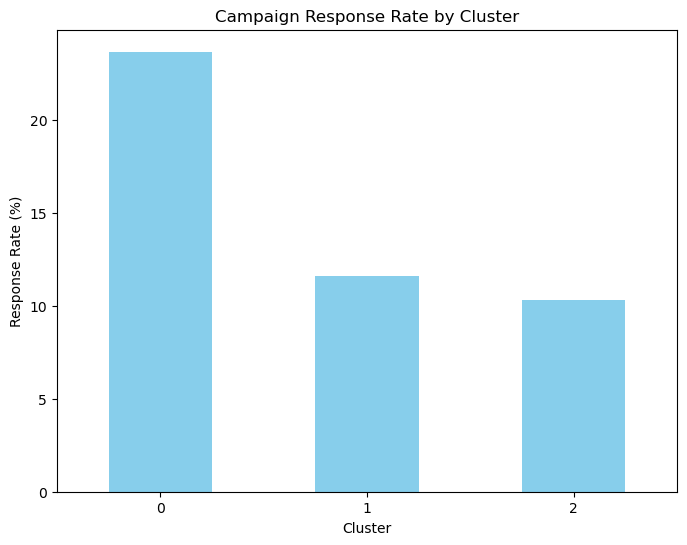

In [172]:
cluster_response.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Campaign Response Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=0)
plt.show()

Cluster
0    1277.906162
1      93.997260
2     469.691720
Name: Total_Spending, dtype: float64


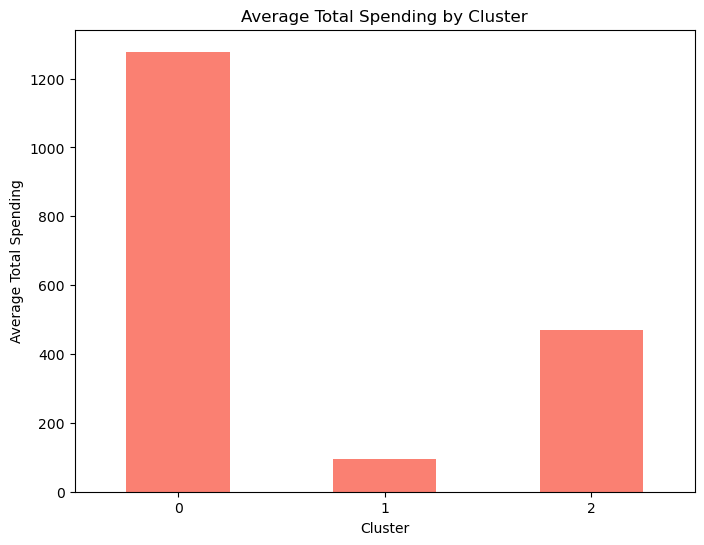

In [119]:
cluster_total_spending = df.groupby('Cluster')['Total_Spending'].mean()
print(cluster_total_spending)
cluster_total_spending.plot(kind='bar', color='salmon', figsize=(8, 6))
plt.title('Average Total Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=0)
plt.show()

### MODEL DEVELOPMENT

In [120]:
df.columns



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_level', 'Age',
       'Total_Campaigns_Accepted', 'log_MntWines', 'log_MntFruits',
       'log_MntMeatProducts', 'log_MntFishProducts', 'log_MntSweetProducts',
       'log_MntGoldProds', 'high_spender_MntWines', 'high_spender_MntFruits',
       'high_spender_MntMeatProducts', 'high_spender_MntFishProducts',
       'high_spender_MntSweetProducts', 'high_spender_MntGoldProds',
       'Total_Spending', 'Age_Group', 'TotalSpent', 'Cluster', 'Month_Joined',
       'Recency_bins', 'NumDeals_bins', 'Used_Discount'],
      d

In [177]:
X=df.copy()
y=df['Response']
X=X.drop(columns=['Response', 'ID', 'Dt_Customer', 'Recency_bins', 'NumDeals_bins', 'Cluster', 'Month_Joined','Education_level','Total_Spending','Year_Birth','Age_Group'],axis=1)

In [181]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [183]:
X.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'Total_Campaigns_Accepted', 'log_MntWines',
       'log_MntFruits', 'log_MntMeatProducts', 'log_MntFishProducts',
       'log_MntSweetProducts', 'log_MntGoldProds', 'high_spender_MntWines',
       'high_spender_MntFruits', 'high_spender_MntMeatProducts',
       'high_spender_MntFishProducts', 'high_spender_MntSweetProducts',
       'high_spender_MntGoldProds', 'TotalSpent', 'Used_Discount'],
      dtype='object')

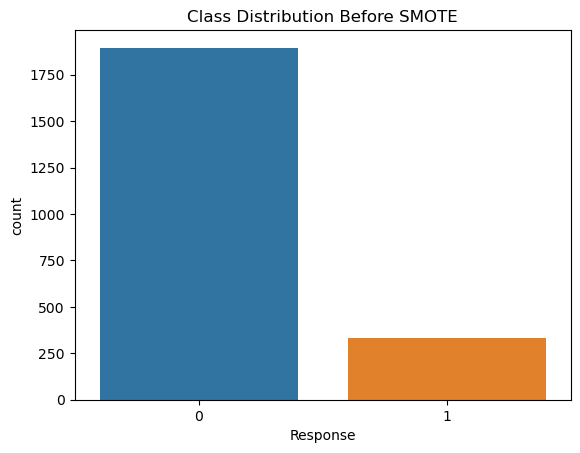

In [184]:
sns.countplot(x='Response',data=df)  # Assuming 'Response' is your target column
plt.title('Class Distribution Before SMOTE')
plt.show()


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

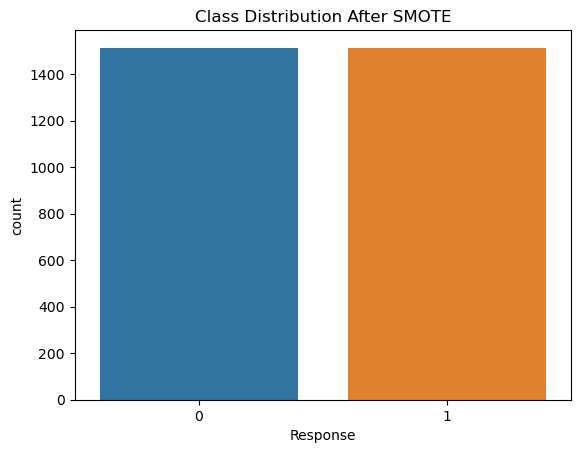

In [187]:
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

1. LINEAR REGRESSION ON DATA 'X'

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Creating a pipeline with preprocessing and a model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
model_pipeline.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'Accept...ceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'Total_Campaigns_Accepted',
       'log_MntWines', 'log_MntFruits', 'log_MntMeatProducts',
       'log_MntFishProducts', 'log_MntSweetProducts', 'log_MntGoldProds',
       'TotalSpent'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

Evaluation metrics of Logistic Regression Model:

	Accuracy: 78.03%
	Precision: 37.01%
	Recall: 72.31%
	F1-Score: 48.96%
Confusion Matrix:
 [[301  80]
 [ 18  47]]


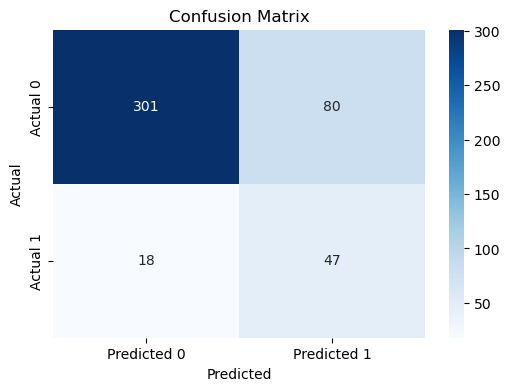

In [193]:
# Predict on test data
y_pred_lr = model_pipeline.predict(X_test)

# Evaluate the model
lr_model_accuracy = accuracy_score(y_test, y_pred_lr)*100
lr_model_precision = precision_score(y_test, y_pred_lr)*100
lr_model_recall = recall_score(y_test, y_pred_lr)*100
lr_model_f1 = f1_score(y_test, y_pred_lr)*100

print("Evaluation metrics of Logistic Regression Model:\n")
print("\tAccuracy: {:.2f}%".format(lr_model_accuracy))
print("\tPrecision: {:.2f}%".format(lr_model_precision))
print("\tRecall: {:.2f}%".format(lr_model_recall))
print("\tF1-Score: {:.2f}%".format(lr_model_f1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. DECISION TREE ON DATA 'X'

Evaluation metrics of Decision Trees Model:

	Accuracy: 80.72%
	Precision: 38.46%
	Recall: 53.85%
	F1-Score: 44.87%
Confusion Matrix:
 [[325  56]
 [ 30  35]]


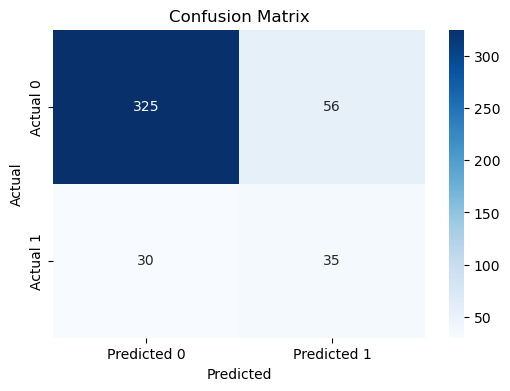

In [194]:
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_smote,y_train_smote)

# Predict the target variable for the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_model_accuracy = accuracy_score(y_test, y_pred_dt) * 100
dt_model_precision = precision_score(y_test, y_pred_dt) * 100
dt_model_recall = recall_score(y_test, y_pred_dt) * 100
dt_model_f1 = f1_score(y_test, y_pred_dt) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Decision Trees Model:\n")
print("\tAccuracy: {:.2f}%".format(dt_model_accuracy))
print("\tPrecision: {:.2f}%".format(dt_model_precision))
print("\tRecall: {:.2f}%".format(dt_model_recall))
print("\tF1-Score: {:.2f}%".format(dt_model_f1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

   3. RANDOM FOREST ON DATA 'X'

Evaluation metrics of Random Forest Model:

	Accuracy: 83.63%
	Precision: 44.87%
	Recall: 53.85%
	F1-Score: 48.95%


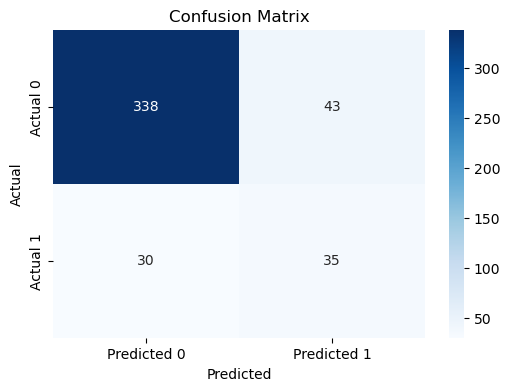

In [219]:
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train_smote,y_train_smote)

# Predict the target variable for the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_model_accuracy = accuracy_score(y_test, y_pred_rf) * 100
rf_model_precision = precision_score(y_test, y_pred_rf) * 100
rf_model_recall = recall_score(y_test, y_pred_rf) * 100
rf_model_f1 = f1_score(y_test, y_pred_rf) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Random Forest Model:\n")
print("\tAccuracy: {:.2f}%".format(rf_model_accuracy))
print("\tPrecision: {:.2f}%".format(rf_model_precision))
print("\tRecall: {:.2f}%".format(rf_model_recall))
print("\tF1-Score: {:.2f}%".format(rf_model_f1))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4. GRADIENT BOOSTING ON DATA 'X'

Evaluation metrics of Gradient Boosting:

	Accuracy: 88.12%
	Precision: 64.29%
	Recall: 41.54%
	F1-Score: 50.47%


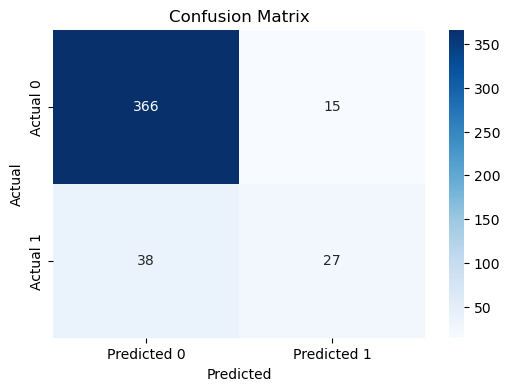

In [196]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train,y_train)

# Predict the target variable for the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_model_accuracy = accuracy_score(y_test, y_pred_gb) * 100
gb_model_precision = precision_score(y_test, y_pred_gb) * 100
gb_model_recall = recall_score(y_test, y_pred_gb) * 100
gb_model_f1 = f1_score(y_test, y_pred_gb) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Gradient Boosting:\n")
print("\tAccuracy: {:.2f}%".format(gb_model_accuracy))
print("\tPrecision: {:.2f}%".format(gb_model_precision))
print("\tRecall: {:.2f}%".format(gb_model_recall))
print("\tF1-Score: {:.2f}%".format(gb_model_f1))

conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

HYPER PARAMETER TUNING FOR RANDOMFOREST

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", rf_grid_search.best_params_)
print("Best F1 Score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\saros\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.4824605701641954


C:\Users\saros\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Evaluation metrics of Random Forest Model with Grid Search CV:

	Accuracy: 85.65%
	Precision: 50.65%
	Recall: 60.00%
	F1-Score: 54.93%


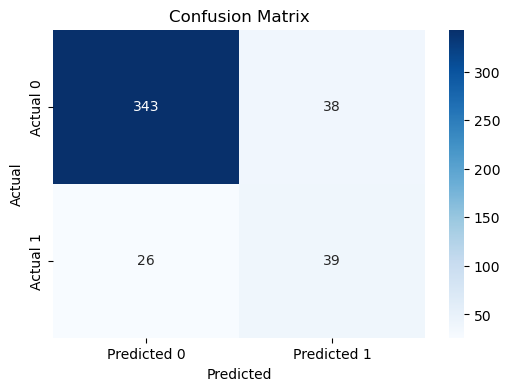

In [207]:
Best_Parameters= {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf_model_best = RandomForestClassifier(**Best_Parameters, random_state=42)

# Train the model with the best parameters
rf_model_best.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf_hp= rf_model_best.predict(X_test)

# Calculate evaluation metrics
rf_model_accuracy = accuracy_score(y_test, y_pred_rf_hp) * 100
rf_model_precision = precision_score(y_test,y_pred_rf_hp) * 100
rf_model_recall = recall_score(y_test,y_pred_rf_hp) * 100
rf_model_f1 = f1_score(y_test,y_pred_rf_hp) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Random Forest Model with Grid Search CV:\n")
print("\tAccuracy: {:.2f}%".format(rf_model_accuracy))
print("\tPrecision: {:.2f}%".format(rf_model_precision))
print("\tRecall: {:.2f}%".format(rf_model_recall))
print("\tF1-Score: {:.2f}%".format(rf_model_f1))


conf_matrix = confusion_matrix(y_test, y_pred_rf_hp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

HYPERPARAMETER TUNING WITH GRADIENT BOOSTING

In [157]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the trees
}

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print out the evaluation metrics for the best model
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.9}
Best Score:  0.9296691487330551
Accuracy: 85.87%
Precision: 51.56%
Recall: 50.77%
F1-Score: 51.16%


<Figure size 600x400 with 0 Axes>

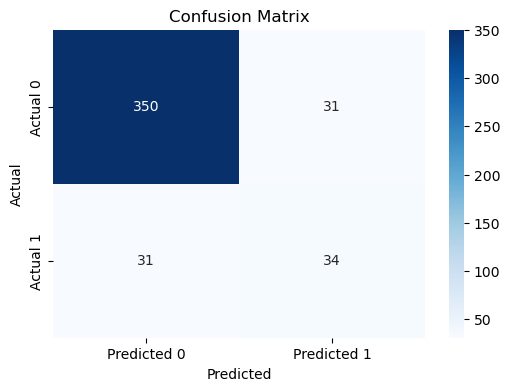

In [208]:
best_params = {
    'n_estimators': 200,          
    'learning_rate': 0.1,         
    'max_depth': 7,               
    'min_samples_split': 10,     
    'subsample': 0.9
}
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = best_gb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [220]:
sample_features = X_test.iloc[19].values.reshape(1, -1)
predicted_response = rf_model.predict(sample_features)
actual_response = y_test.iloc[19]
print("Sample Features:", X_test.iloc[19])
print("Predicted Response:", predicted_response) 
print("Actual Response:", actual_response) 
if predicted_response == actual_response:
    print("The model predicted the response correctly!")
else:
    print("The model prediction was incorrect.")

Sample Features: Education                            2.000000
Marital_Status                       2.000000
Income                           47958.000000
Kidhome                              0.000000
Teenhome                             1.000000
Recency                              8.000000
MntWines                           268.000000
MntFruits                           11.000000
MntMeatProducts                     88.000000
MntFishProducts                     15.000000
MntSweetProducts                     3.000000
MntGoldProds                        22.000000
NumDealsPurchases                    2.000000
NumWebPurchases                      6.000000
NumCatalogPurchases                  3.000000
NumStorePurchases                    5.000000
NumWebVisitsMonth                    5.000000
AcceptedCmp3                         0.000000
AcceptedCmp4                         0.000000
AcceptedCmp5                         0.000000
AcceptedCmp1                         0.000000
AcceptedCmp2     

C:\Users\saros\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


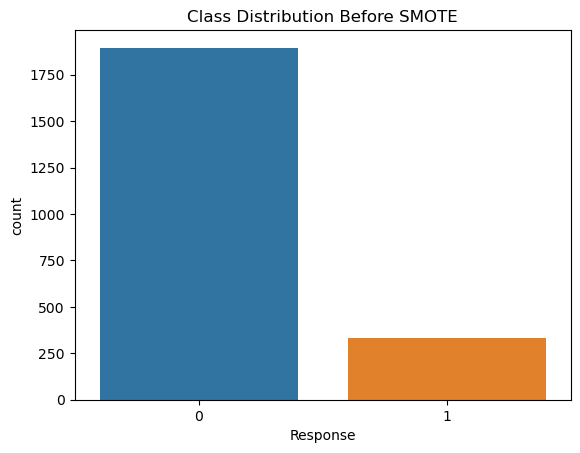

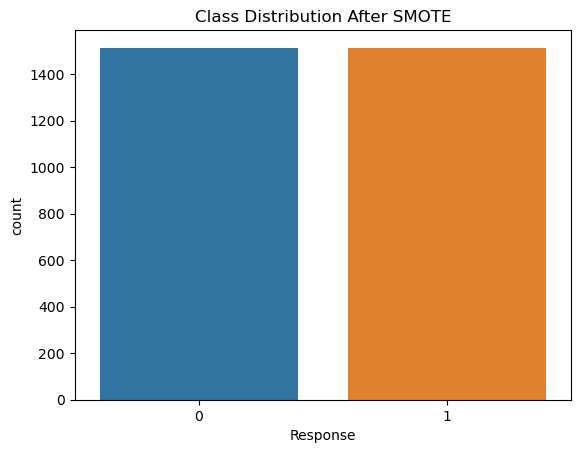

In [217]:
# Before SMOTE
sns.countplot(x='Response',data=df)  # Assuming 'Response' is your target column
plt.title('Class Distribution Before SMOTE')
plt.show()

# After SMOTE
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()
